In [1]:
import sys
import os

# Add the root directory to sys.path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))

from dsa_analysis import load_config, visualize, visualize_same_plot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import interpolate
import main
from main import RNNLayer
import ast
import DSA
from notebooks.utils_rnn import *
import copy
%load_ext autoreload
%autoreload 2

### Load config

In [2]:
config = load_config("../config.yaml")
taskset = "PDM"

### Get dynamics to plot

In [4]:
model = "leaky_gru_softplus_256_0.01_128_train.pth"

#### Pretrain unfrozen

In [5]:
group = "master"
model_type, activation, hidden_size, lr, batch_size = parse_model_info(model)
curve_master = get_dynamics_rnn(
    model_type, activation, hidden_size, lr, model, group, "cpu", taskset
)

In [6]:
group = "pretrain_frozen"
model_type, activation, hidden_size, lr, batch_size = parse_model_info(model)
curve_pretrain_frozen = get_dynamics_rnn(
    model_type, activation, hidden_size, lr, model, group, "cpu", taskset
)

In [7]:
group = "pretrain_basic_frozen"
model_type, activation, hidden_size, lr, batch_size = parse_model_info(model)
curve_pretrain_basic_frozen = get_dynamics_rnn(
    model_type, activation, hidden_size, lr, model, group, "cpu", taskset
)

In [8]:
group = "untrained"
model_type, activation, hidden_size, lr, batch_size = parse_model_info(model)
curve_untrained = get_dynamics_rnn(
    model_type, activation, hidden_size, lr, model, group, "cpu", taskset
)

In [9]:
curves_groups = [
    curve_untrained,
    curve_pretrain_frozen,
    curve_pretrain_basic_frozen,
    curve_master,
]


In [10]:
# reduce again curves to 3 components only to visualize
curves_groups_to_plot, explained_variance = main.compute_common_pca(curves_groups, n_components=3)
curves_groups_to_plot = [np.mean(curve, axis=1) for curve in curves_groups_to_plot]

/Users/qguilhot/Library/Mobile Documents/com~apple~CloudDocs/ETHZ/RepAL/dsa_analysis/visualize_patterns.py:90: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


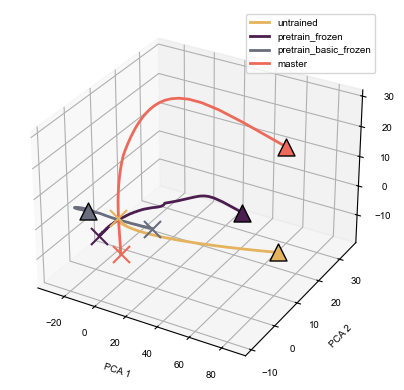

In [11]:
visualize_same_plot(
    model=curves_groups_to_plot,
    titles=["untrained", "pretrain_frozen", "pretrain_basic_frozen", "master"],
    palette=color_mapping,
)